# Ratings Prediction Project

### Problem Statement:
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. the reviewer will have to add stars (ratings) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars and 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.


### Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps mentioned below:
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the Best ML model

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Importing nltk libraries
import re
import string
import missingno
import pandas_profiling
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

lemmatizer = nltk.stem.WordNetLemmatizer()

Importing all the necessary libraries/packages here.

In [2]:
df = pd.read_csv("Review_Rating_File.csv")
df # checking the first five and last five rows of our dataset

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Review after 39 months 2 days,&nbsp;This monitor has been good for 3 years w...,2.0 out of 5 stars
1,1,too bright and enough contrast.,The monitor is what you pay for... The screen ...,2.0 out of 5 stars
2,2,Horizontal pixel lines and flickering problem ...,"&nbsp;I bought 2 monitors on this last Aug, Bu...",2.0 out of 5 stars
3,3,Lacks basic connectivity,Let me highlight the negatives. There is no us...,2.0 out of 5 stars
4,4,Brightness uniformity is terrible,The first product I received has an issue i.e ...,2.0 out of 5 stars
...,...,...,...,...
86369,86369,Mind-blowing purchase,Super,5.0
86370,86370,Slightly disappointed,Side angle view is too bad.,2.0
86371,86371,Awesome,Nice,5.0
86372,86372,Wonderful,Fabulous picture quality it's so satisfied.,5.0


Column Information:
- Review_title : title of the review
- Review_text : content of the review text
- Ratings : ratings are out of 5 stars

First I will drop the unwanted column "Unnamed: 0" from our dataset as it holds meaning less index information.

# Exploratory Data Analysis

In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 86374 Rows and 3 Columns in our dataframe


,Review_title,Review_text,Ratings
0,Review after 39 months 2 days,&nbsp;This monitor has been good for 3 years w...,2.0 out of 5 stars
1,too bright and enough contrast.,The monitor is what you pay for... The screen ...,2.0 out of 5 stars
2,Horizontal pixel lines and flickering problem ...,"&nbsp;I bought 2 monitors on this last Aug, Bu...",2.0 out of 5 stars
3,Lacks basic connectivity,Let me highlight the negatives. There is no us...,2.0 out of 5 stars
4,Brightness uniformity is terrible,The first product I received has an issue i.e ...,2.0 out of 5 stars
5,Not for programming,"Made a mistake of buying this for coding, but ...",2.0 out of 5 stars
6,No standard monitor power cable and HDMI. Cann...,1) Provided only 16Amp power cable. Meant this...,2.0 out of 5 stars
7,good monitor..but damaged easily and unsatisfa...,i purchased this monitor and the internal pan...,2.0 out of 5 stars
8,Speakers are a joke,The two in-built speakers are nothing but a jo...,2.0 out of 5 stars
9,"Just another average monitor, with defects in ...",Probably I am one of those few people to get h...,2.0 out of 5 stars


It looks like our dataframe has 86374 Rows and 3 Columns but we do observe some NaN values that will need to be removed to clean our dataset and make it free from missing values.

In [5]:
df.isna().sum() # checking for missing values

Review_title    13652
Review_text     11302
Ratings         13649
dtype: int64

Using the `isna` and `sum` options together we can confirm that there some missing values in all the 3 columns of our dataset that will need to be treated.

<AxesSubplot:>

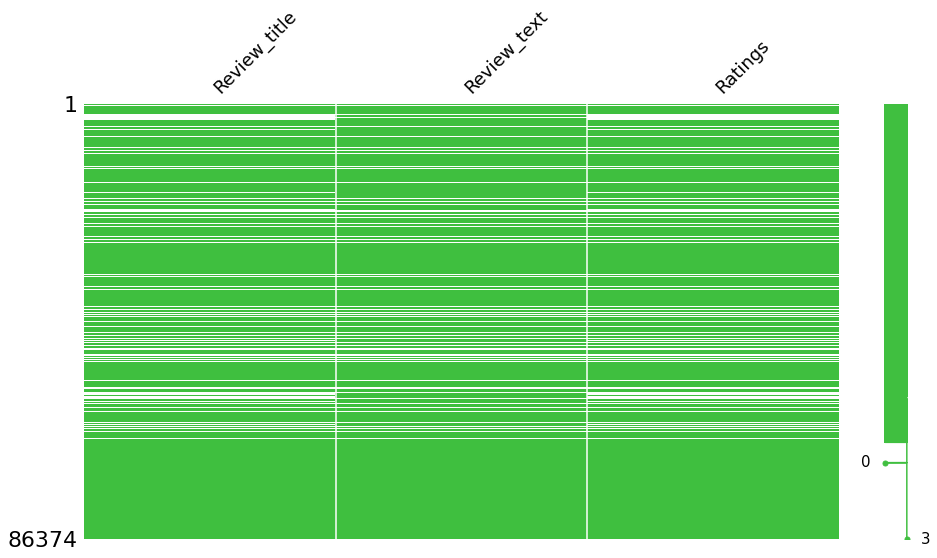

In [6]:
missingno.matrix(df, figsize = (15,8), color=(0.25, 0.75, 0.25), fontsize=18)

Was just ensuring the missing data information with the help of a visual using `missingno`. We can see that the above white lines represent the NaN values present in our dataframe that will need to be removed.

In [7]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 86374 Rows and 3 Columns in our dataframe before removing NaN
We have 72277 Rows and 3 Columns in our dataframe after removing NaN


In [8]:
df.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

Great looks like we were able to successfully remove all the missing data and the new dataframe has 68294 Rows and 3 Columns in it.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72277 entries, 0 to 86373
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  72277 non-null  object
 1   Review_text   72277 non-null  object
 2   Ratings       72277 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


Using the `info` method we are able to confirm the non null count details as well as the datatype information. We have all the 3 columns showing as object datatype here.

In [10]:
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '4.0', '5.0', '1.0',
       '3.0', '2.0'], dtype=object)

Looking at these unique values in our target column we can see that the string enteries need to be replaced with the respective numeric values (number of stars)

In [11]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)

df['Ratings'] = df['Ratings'].replace('1.0',1)
df['Ratings'] = df['Ratings'].replace('2.0',2)
df['Ratings'] = df['Ratings'].replace('3.0',3)
df['Ratings'] = df['Ratings'].replace('4.0',4)
df['Ratings'] = df['Ratings'].replace('5.0',5)

df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

So we were able to incorporate the string object datatype values with numeric star values and the target column is clean with integer data in it.

In [12]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Review after 39 months 2 days,&nbsp;This monitor has been good for 3 years w...,2,Review after 39 months 2 days &nbsp;This monit...
1,too bright and enough contrast.,The monitor is what you pay for... The screen ...,2,too bright and enough contrast. The monitor is...
2,Horizontal pixel lines and flickering problem ...,"&nbsp;I bought 2 monitors on this last Aug, Bu...",2,Horizontal pixel lines and flickering problem ...
3,Lacks basic connectivity,Let me highlight the negatives. There is no us...,2,Lacks basic connectivity Let me highlight the ...
4,Brightness uniformity is terrible,The first product I received has an issue i.e ...,2,Brightness uniformity is terrible The first pr...
...,...,...,...,...
86369,Mind-blowing purchase,Super,5,Mind-blowing purchase Super
86370,Slightly disappointed,Side angle view is too bad.,2,Slightly disappointed Side angle view is too bad.
86371,Awesome,Nice,5,Awesome Nice
86372,Wonderful,Fabulous picture quality it's so satisfied.,5,Wonderful Fabulous picture quality it's so sat...


I have combined the columns Review_title and Review_text to create a new column called Review that has the consolidated comments.

### Visualizing text in first three rows from the newly created "Review" column

In [13]:
df['Review'][0]

'Review after 39 months 2 days &nbsp;This monitor has been good for 3 years which I bought at 11512 INR. It suddenly started flickering after 39 months 2 days for which I could not avail warranty (the warranty is for 39 months). I contacted Benq service center and they were very prompt in addressing the issue. But, they confirmed it a problem of the panel which is very costly to replace (costs close to the monitor itself). Also, the replaced panel has a warranty for 3 months only. So, repairing is not at all worthy. They provided no extended warranty for 2 days or any other adjustment. So, I have to buy a new monitor ( I am done with Benq). The manufacturer precisely calculated the average lifespan and set the warranty period. For a longer lifespan and durability, choose LG or Dell. It is not value-for-money for the long run. I gave 2 stars for the 3 years working.'

In [14]:
df['Review'][1]

'too bright and enough contrast. The monitor is what you pay for... The screen is too bright with very poor contrast for any night time work. The contrast is soo bad that to see anything dark clearly, you have to crank up the britghtness. This means you cant work in the dark or night time.<br>The whole idea of LOW BLUE LIGHT and eye strain etc is defeated if you screen is too bright.<br>The speakers are a joke, my 5 year old laptop has better speakers. and a monitor DOES NOT NEED speakers.<br>This feels more like a bad TV than a good monitor.<br><br>All said, i still bought it because it was cheap, and have a great DELL monitor i can use for low light performance.'

In [15]:
df['Review'][2]

"Horizontal pixel lines and flickering problem came in just 1 week for 2 monitors &nbsp;I bought 2 monitors on this last Aug, But one of them keep on getting issues like Horizontal pixel lines and flickering problem. So I thought it's my bad luck that I got a manufacturing defect product. So I returned it and requested for a replacement.<br>The Amazon shipping was too good that the replacement came in 2 or 3 days .. But again this worst horizontal pixel line popped up into the replacement monitor after 1 week. So I returned  the replacement monitor too... I wonder what happened to benq.. that their monitor is not even lasting 2 weeks! I tried it 2 freaking times coz I like Benq... Now I'm in confistion that I should again go for benq or I should find some other brand ... Please suggest if you guys got any good ones other than this..because God already gave me 2 chances ... I don't wajt to spoil the third one tbh"

### Text Processing to remove unwanted punctuations and special characters

In [17]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r"<br><br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [18]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Visualizing text in first three rows after applying various text cleaning procedures

In [19]:
df['Review'][0]

'review 39 months 2 days nbspthis monitor good 3 years bought 11512 inr suddenly started flickering 39 months 2 days could avail warranty warranty 39 months contacted benq service center prompt addressing issue confirmed problem panel costly replace costs close monitor also replaced panel warranty 3 months repairing worthy provided extended warranty 2 days adjustment buy new monitor done benq manufacturer precisely calculated average lifespan set warranty period longer lifespan durability choose lg dell valueformoney long run gave 2 stars 3 years working'

In [20]:
df['Review'][1]

'bright enough contrast monitor pay screen bright poor contrast night time work contrast soo bad see anything dark clearly crank britghtness means cant work dark night time whole idea low blue light eye strain etc defeated screen bright speakers joke 5 year old laptop better speakers monitor need speakers feels like bad tv good monitor said still bought cheap great dell monitor use low light performance'

In [21]:
df['Review'][2]

'horizontal pixel lines flickering problem came 1 week 2 monitors nbspi bought 2 monitors last aug one keep getting issues like horizontal pixel lines flickering problem thought bad luck got manufacturing defect product returned requested replacement amazon shipping good replacement came 2 3 days worst horizontal pixel line popped replacement monitor 1 week returned replacement monitor wonder happened benq monitor even lasting 2 weeks tried 2 freaking times coz like benq confistion go benq find brand please suggest guys got good ones thisbecause god already gave 2 chances wajt spoil third one tbh'

### Lemmatization

In [22]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [23]:
df['Review'][0]

'review 39 month 2 day nbspthis monitor good 3 year buy 11512 inr suddenly start flicker 39 month 2 day could avail warranty warranty 39 month contact benq service center prompt address issue confirm problem panel costly replace cost close monitor also replace panel warranty 3 month repair worthy provide extended warranty 2 day adjustment buy new monitor do benq manufacturer precisely calculated average lifespan set warranty period longer lifespan durability choose lg dell valueformoney long run give 2 star 3 year work'

In [24]:
df['Review'][1]

'bright enough contrast monitor pay screen bright poor contrast night time work contrast soo bad see anything dark clearly crank britghtness mean cant work dark night time whole idea low blue light eye strain etc defeat screen bright speaker joke 5 year old laptop good speaker monitor need speaker feel like bad tv good monitor say still buy cheap great dell monitor use low light performance'

In [25]:
df['Review'][2]

'horizontal pixel line flicker problem come 1 week 2 monitor nbspi buy 2 monitor last aug one keep get issue like horizontal pixel line flicker problem think bad luck get manufacture defect product return requested replacement amazon ship good replacement come 2 3 day worst horizontal pixel line pop replacement monitor 1 week return replacement monitor wonder happen benq monitor even last 2 week try 2 freak time coz like benq confistion go benq find brand please suggest guy get good one thisbecause god already give 2 chance wajt spoil third one tbh'

### Text Normalization - Standardization

In [26]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [27]:
df['Review'][0]

'review  month  day nbspthis monitor good  year buy  inr suddenly start flicker  month  day could avail warranty warranty  month contact benq service center prompt address issue confirm problem panel costly replace cost close monitor also replace panel warranty  month repair worthy provide extended warranty  day adjustment buy new monitor do benq manufacturer precisely calculated average lifespan set warranty period longer lifespan durability choose lg dell valueformoney long run give  star  year work'

In [28]:
df['Review'][1]

'bright enough contrast monitor pay screen bright poor contrast night time work contrast soo bad see anything dark clearly crank britghtness mean cant work dark night time whole idea low blue light eye strain etc defeat screen bright speaker joke  year old laptop good speaker monitor need speaker feel like bad tv good monitor say still buy cheap great dell monitor use low light performance'

In [29]:
df['Review'][2]

'horizontal pixel line flicker problem come  week  monitor nbspi buy  monitor last aug one keep get issue like horizontal pixel line flicker problem think bad luck get manufacture defect product return requested replacement amazon ship good replacement come   day worst horizontal pixel line pop replacement monitor  week return replacement monitor wonder happen benq monitor even last  week try  freak time coz like benq confistion go benq find brand please suggest guy get good one thisbecause god already give  chance wajt spoil third one tbh'

### Word Counts

In [30]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,83,review month day nbspthis monitor good year...
1,66,bright enough contrast monitor pay screen brig...
2,93,horizontal pixel line flicker problem come we...
3,45,lack basic connectivity let highlight negative...
4,153,brightness uniformity terrible first product r...
5,44,program make mistake buying cod issue pixel de...
6,77,standard monitor power cable hdmi can not use ...
7,88,good monitorbut damage easily unsatisfactory s...
8,76,speaker joke two inbuilt speaker nothing joke ...
9,98,another average monitor defect manufacture pro...


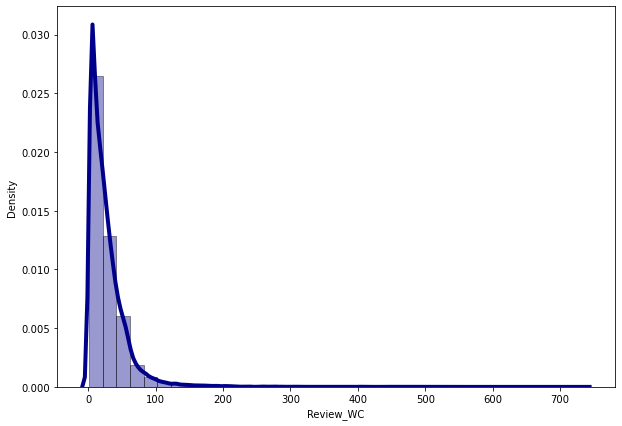

In [31]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Looking at the above histogram we can clearly observe that most of our text is having the number of words in the range of 0 to 200. But some of the reviews are too lengthy which may act like outliers in our data.

### Character Counts

In [32]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,505,review month day nbspthis monitor good year...
1,391,bright enough contrast monitor pay screen brig...
2,544,horizontal pixel line flicker problem come we...
3,281,lack basic connectivity let highlight negative...
4,999,brightness uniformity terrible first product r...
5,273,program make mistake buying cod issue pixel de...
6,468,standard monitor power cable hdmi can not use ...
7,600,good monitorbut damage easily unsatisfactory s...
8,477,speaker joke two inbuilt speaker nothing joke ...
9,690,another average monitor defect manufacture pro...


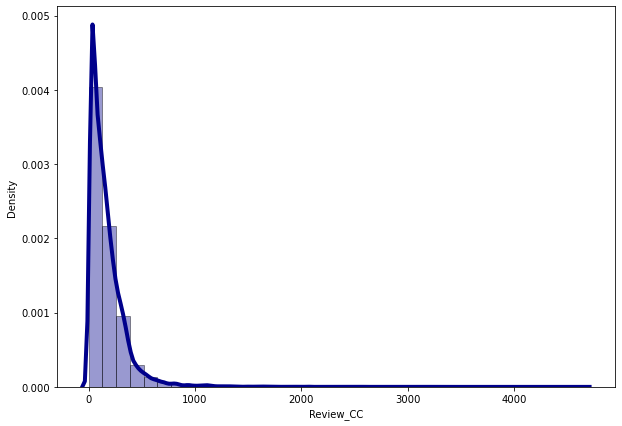

In [33]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

### Removing Outliers

In [34]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 71123 Rows and 6 Columns in our dataframe after removing outliers


As we know that some of the review are too lengthy I am removing those reviews from the data as outliers using Z score method. By removing outliers we are loosing only arround 1000 entries which is acceptable here for getting beter results for our model.

# Visualization

In [33]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Plotting histograms for word count and character count again after removing the outliers

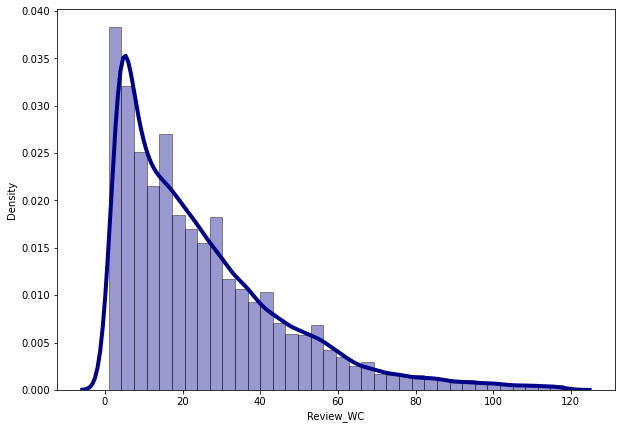

In [35]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that number and density for short word reviews are greater than the one's with lengthy detailed information.

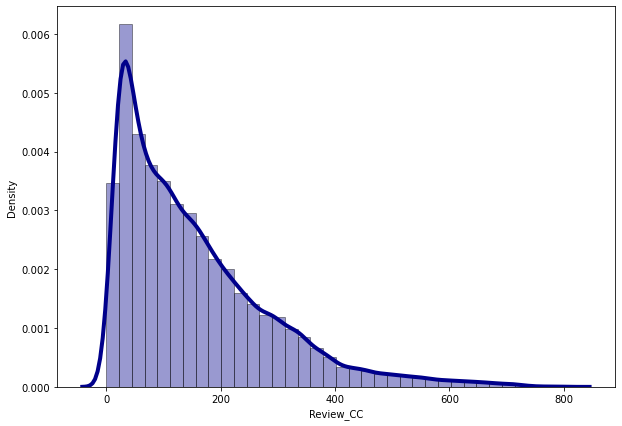

In [36]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that the character details are automatically similar to the word count details and very few people go to the lengths of typing summarized review comments.

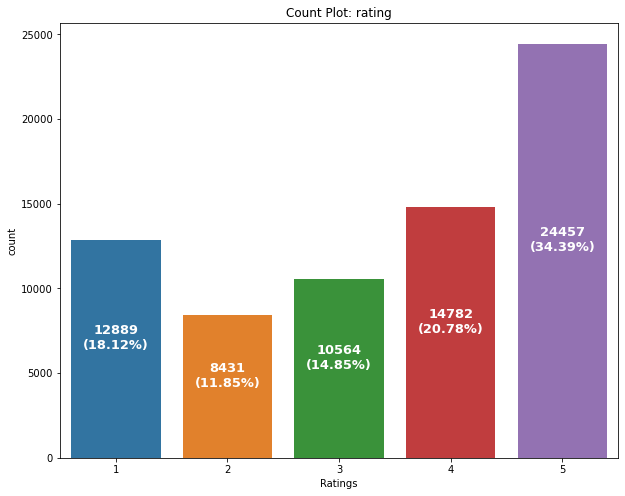

In [37]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

Observation:
- We can see that the highest number of customer rating received are for 5 stars
- Then we have 4 star rating reviews present in our dataset
- However we see a high 1 star rating as well compared to 2 and 3 star rating reviews

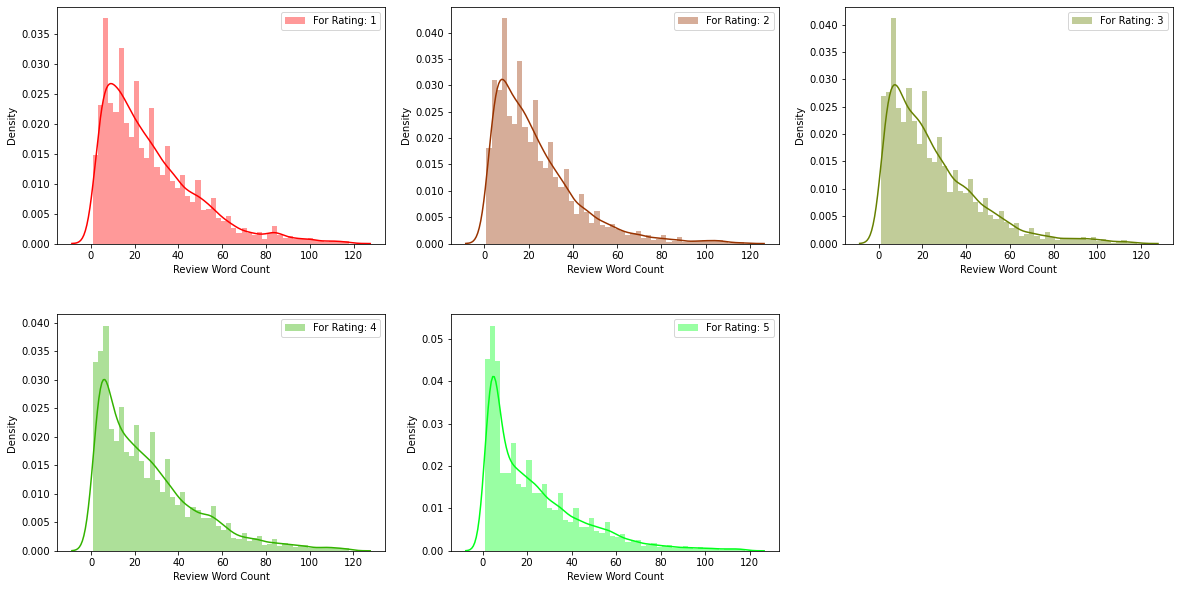

In [38]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

Observation:
The above word count histogram+distributions for each and every rating shows that when people are disappointed with a service they tend to mention a discriptive review as compared to when they are happy they use lesser words to express the joy of having got a great product.

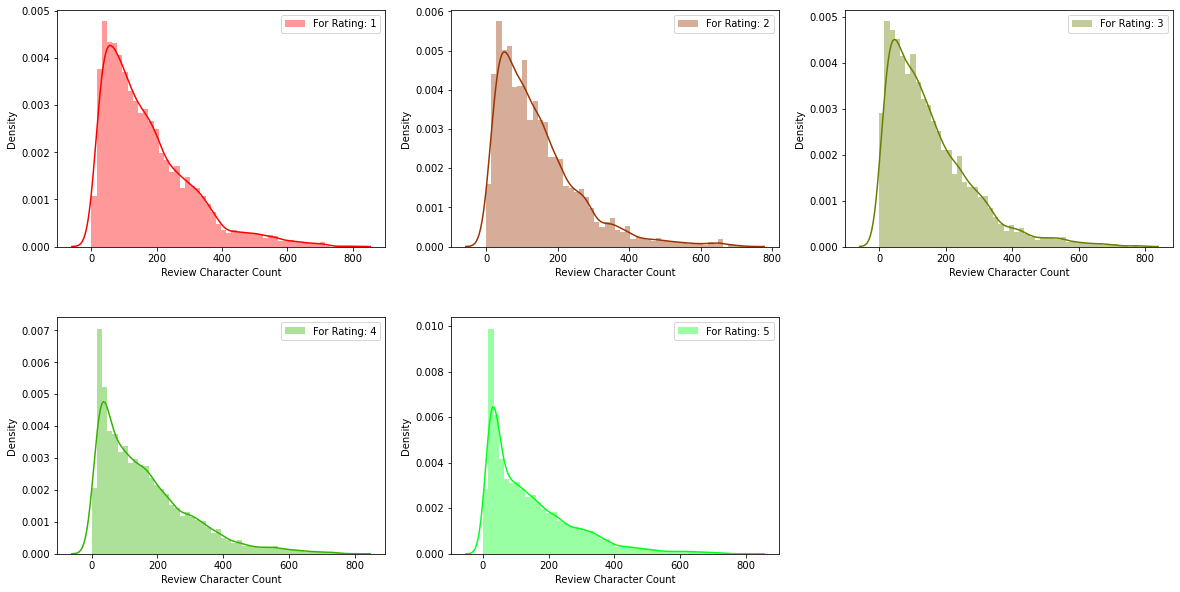

In [39]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

Observation:
Just as in the case of word count histogram+distribution plots the pattern is quite evident that Rating 5 reviews have lesser character counts on their comments when compared to the lower rating details.

### Displaying loud words with Word Cloud information

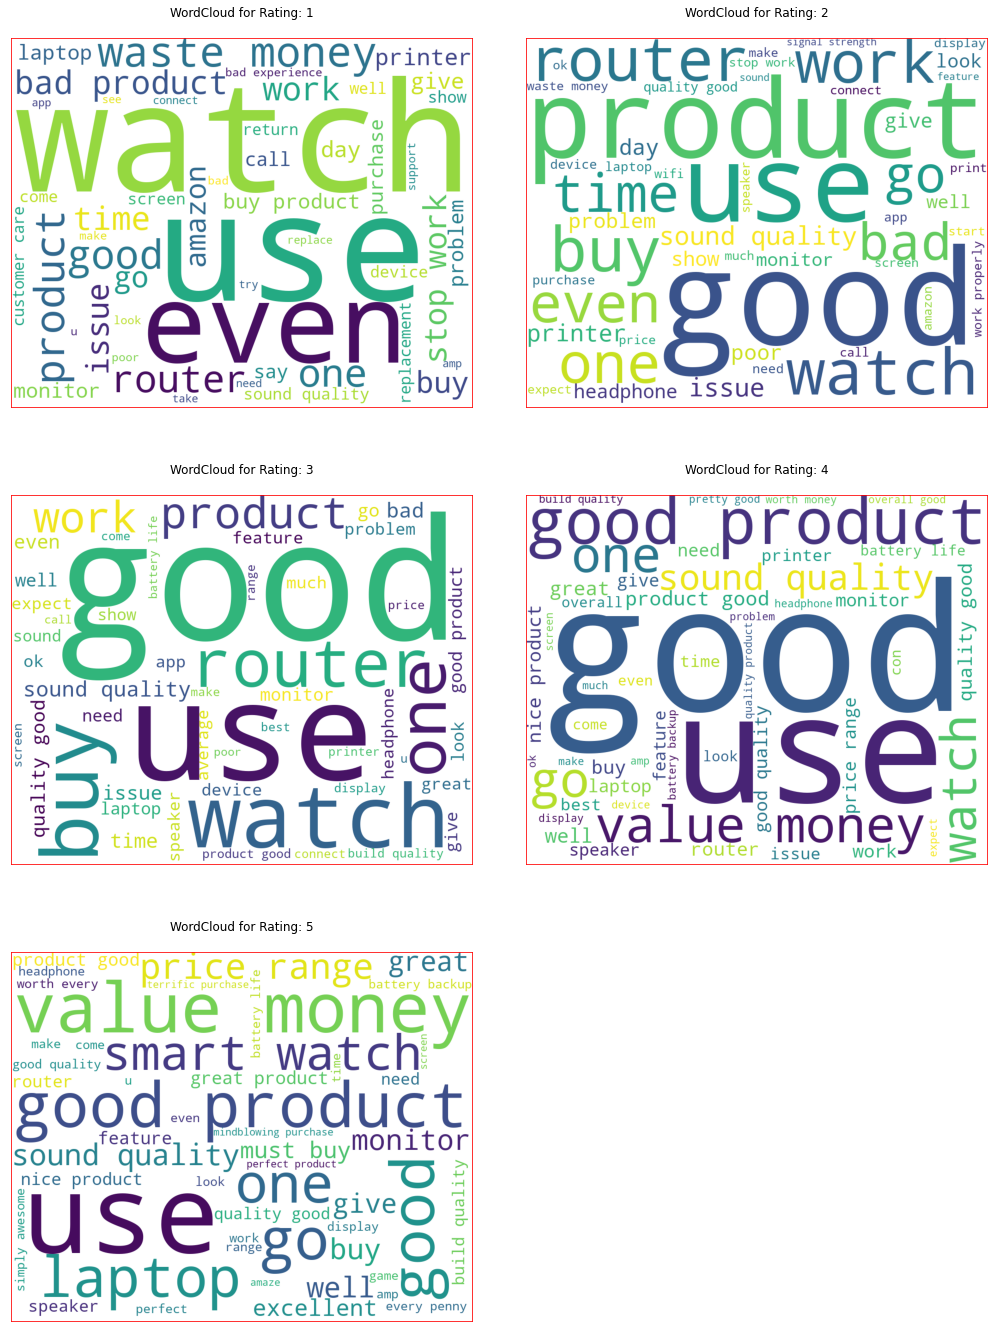

In [40]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(df.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(df.Review[df.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

Observation:

`For Rating: 1`
- It mostly consists of words like watch, use, bad product, waste, time, money, bad experience, issue etc

`For Rating: 2`
- It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc

`For Rating: 3`
- It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc

`For Rating: 4`
- It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc

`For Rating: 5`
- It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc

5    24457
4    14782
1    12889
3    10564
2     8431
Name: Ratings, dtype: int64


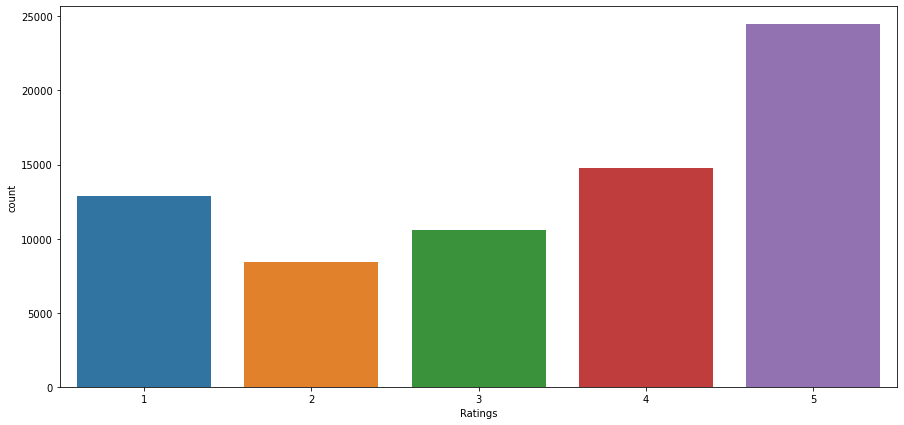

In [41]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Observation:
- Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.
- Which will cause the **Imbalance** problem for our Machine Learning model and make it bias.
- So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
- For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart)
- Then I will select equal number of data of every category and ensure that the rating values are balanced

In [42]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,excellent,excellent product,5,excellent excellent product,3,27
1,Just wow!,Nice watch,5,wow nice watch,3,14
2,Simply waste product,&nbsp;Really am not satisfied with this produc...,1,simply waste product nbspreally satisfied prod...,14,98
3,Overall a Good product at the price of 3K,On time delivery by Amazon. Print quality is G...,4,overall good product price k time delivery ama...,97,596
4,Poor choice of mine do not attract with 3 antenna,Poor Chinese stuff<br>Giving my feedback after...,2,poor choice mine attract antenna poor chinese...,25,128
...,...,...,...,...,...,...
71118,Worst laptop i have ever seen.,Too slow laptop. Dont buy,1,bad laptop ever see slow laptop dont buy,8,40
71119,Bang for the buck with great speakers,The only monitor with good speakers which is s...,5,bang buck great speaker monitor good speaker s...,20,120
71120,Great product,Such a beautiful Watch. Nice looking and super...,5,great product beautiful watch nice look superb...,12,73
71121,Not working at all,Not working anymore .. giving less speed no is...,2,work work anymore give less speed issue intern...,9,57


In [43]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:8431]
df2 = df[df['Ratings']==2][0:8431]
df3 = df[df['Ratings']==3][0:8431]
df4 = df[df['Ratings']==4][0:8431]
df5 = df[df['Ratings']==5][0:8431]

# Combining all the dataframes into one and shuffling them again
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Useless product,Quality down,1,useless product quality,3,23
1,Disappointed!,I am disappointed with this product. Previousl...,3,disappoint disappointed product previously buy...,30,187
2,Bluetooth connection not proper. Voice breaks...,Bluetooth connection not proper. Voice breaks...,1,bluetooth connection proper voice break blueto...,14,121
3,Satisfaction,This is a child of Mitashi.<br>When music is p...,4,satisfaction child mitashi music play full vol...,11,81
4,Cannot trust electronic products on Amazon.,The product was already returned by some other...,2,can not trust electronic product amazon produc...,33,211
...,...,...,...,...,...,...
42150,Not quite expected and no returns also,The audio quality is not good. I don't know if...,2,quite expect return also audio quality good kn...,48,315
42151,Good,Quality is good,2,good quality good,3,17
42152,Good,"While taking a print, getting more sound",3,good take print get sound,5,25
42153,The cartridge no. 803 is discontinued from market,"So, this printer uses cartridge no. 803. It is...",3,cartridge discontinue market printer use cart...,22,154


1    8431
3    8431
4    8431
2    8431
5    8431
Name: Ratings, dtype: int64


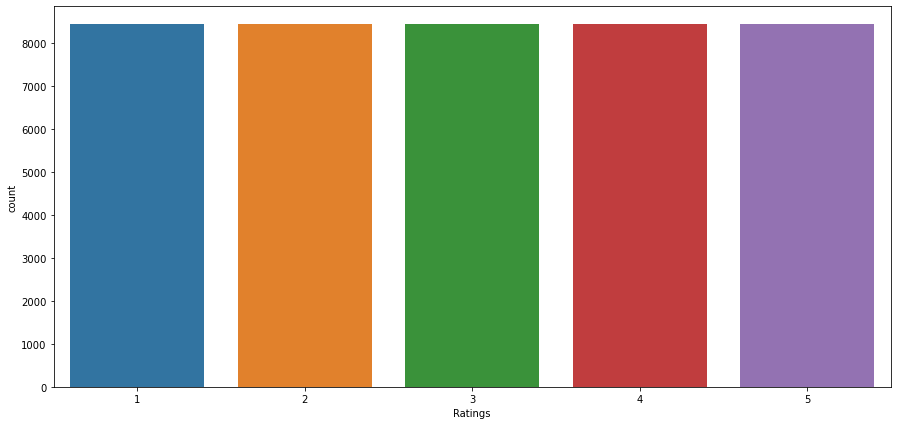

In [44]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Great! we have balanced our data successfully.

### Top 30 most frequently occuring words

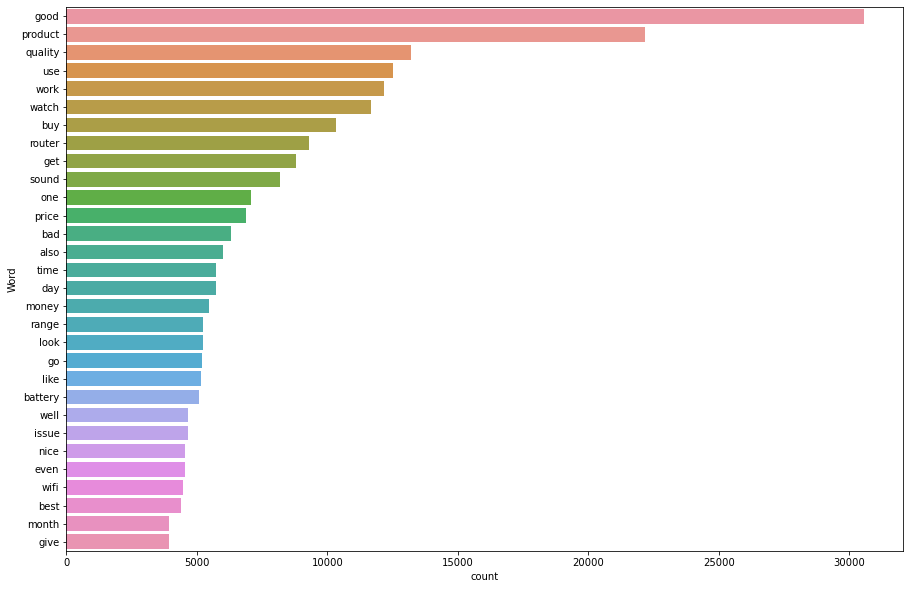

In [45]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])    

### Top 30 rarely occuring words

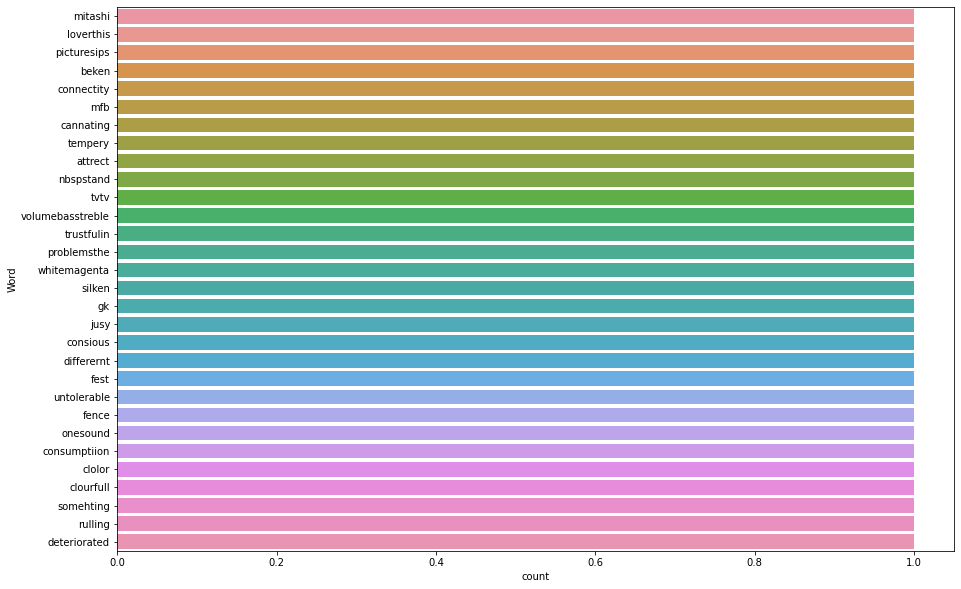

In [46]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])    

# Model Building and Evaluation Metrics

In [47]:
# Separating features and labels here
x = df['Review']
y = df['Ratings']

### Converting text into vectors using TfidfVectorizer

In [48]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

### Splitting the data into train and test datasets

In [50]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (29508, 150000)
x_test (12647, 150000)
y_train (29508,)
y_test (12647,)


In [51]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier(verbosity=0)

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

### Training and testing of all the classification algorithms

In [50]:
for model in [lr,svc,bnb,mnb,sgd,rf,xgb,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 70.984230560087
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.74      0.78      0.76      1834
           2       0.63      0.62      0.62      1862
           3       0.62      0.64      0.63      1822
           4       0.70      0.70      0.70      1819
           5       0.86      0.81      0.84      1858

    accuracy                           0.71      9195
   macro avg       0.71      0.71      0.71      9195
weighted avg       0.71      0.71      0.71      9195

CONFUSION MATRIX: 
 [[1428  282   90   26    8]
 [ 328 1158  281   76   19]
 [ 126  294 1158  203   41]
 [  27   82  264 1272  174]
 [  21   28   61  237 1511]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURACY 

We can see that the accuracy scores for LogisticRegression, LinearSVC, SGDClassifier, RandomForestClassifier, XGBClassifier and LGBMClassifier algorithms are all above 70% range and we shall cross validate them to choose the best scored classification algorithm amongst them.

# Cross validation score for best score models

In [53]:
# I am checking cross-validation score only for those algorithms which are giving us better accuracies

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,sgd,rf,lgb,xgb]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 70.163132137031


******************************LinearSVC******************************
Cross validation score: 69.88308863512779


******************************SGDClassifier******************************
Cross validation score: 69.7389885807504


******************************RandomForestClassifier******************************
Cross validation score: 70.29363784665578


******************************LGBMClassifier******************************
Cross validation score: 69.76345840130506


******************************XGBClassifier******************************
Cross validation score: 69.67917346383904




In the above cell we cross validated the LogisticRegression, LinearSVC, SGDClassifier, RandomForestClassifier, XGBClassifier and LGBMClassifier algorithms to ensure we pick the best option that does not have any over fitting or underfitting concerns. I can see that **RandomForestClassifier** has produced the best outcome and we shall use it for further tuning the accuracy percentage.

# HyperParameter Tuning

In [55]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 3.6min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 3.5min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 3.6min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 7.2min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 6.9min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 7.2min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 3.7min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 3.6min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 3.7min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_esti

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [56]:
GSCV.best_params_ # Selecting the best parameters found by GridSearchCV

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 800,
 'n_estimators': 200}

In [57]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 72.33278955954323

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.73      0.82      0.77      1834
           2       0.68      0.63      0.66      1862
           3       0.67      0.64      0.65      1822
           4       0.70      0.72      0.71      1819
           5       0.83      0.81      0.82      1858

    accuracy                           0.72      9195
   macro avg       0.72      0.72      0.72      9195
weighted avg       0.72      0.72      0.72      9195


CONFUSION MATRIX: 
 [[1504  210   80   27   13]
 [ 345 1179  213   91   34]
 [ 147  241 1161  202   71]
 [  40   75  210 1305  189]
 [  31   26   70  229 1502]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

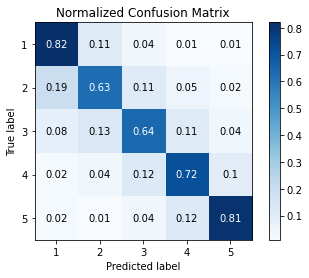

In [59]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

# Saving the best model

In [60]:
joblib.dump(best_model, "Rating_Prediction_Saved_Model.pkl")

['Rating_Prediction_Saved_Model.pkl']

# Loading the final model

In [61]:
Model = joblib.load("Rating_Prediction_Saved_Model.pkl")

In [63]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
results = pd.DataFrame()
results['Predicted Review Ratings'] = prediction
results['Actual Review Ratings'] = y
results

,Predicted Review Ratings,Actual Review Ratings
0,2,4
1,2,2
2,4,1
3,5,4
4,3,1
...,...,...
9190,4,2
9191,1,5
9192,2,3
9193,1,3


In [64]:
# Converting the dataframe into CSV format and saving it
results.to_csv('PredictedvsActual_Ratings_Results.csv', index=False)

# Inference:

`Key findings of the study:`
In this project I have collected data of reviews and ratings for different products from amazon.in and flipkart.com. Then I have done different text processing for reviews column and chose equal number of text from each rating class to eliminate problem of imbalance. By doing different EDA steps I have analyzed the text. We have checked frequently occurring words in our data as well as rarely occurring words. After all these steps I have built function to train and test different algorithms and using various evaluation metrics I have selected Random Forest Classifier for our final model. Finally by doing hyperparameter tuning we got optimum parameters for our final model. And finally we got improved accuracy score for our final model.

`Limitations of this work and scope for the future work:`
As we know the content of text in reviews is totally depends on the reviewer and they may rate differently which is totally depends on that particular person. So it is difficult to predict ratings based on the reviews with higher accuracies. Still we can improve our accuracy by fetching more data and by doing extensive hyperparameter tuning.

`Areas of improvement:`
- Less time complexity
- More computational power can be given
- More accurate reviews can be given
- Many more permutations and combinations in hyper paramter tuning can be used to obtain better parameter list

`Final Remarks:`
After applying the hyper parameter tuning the best accuracy score obtained was **72.33%** which can be further improved by obtaining more data and working up through other parameter combinations.
